In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


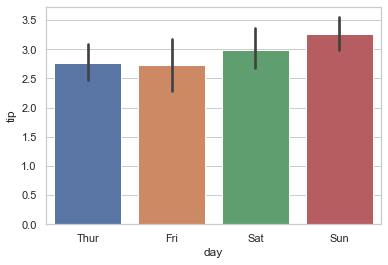

In [4]:
ax = sns.barplot(x="day", y="tip", data=tips)

In [5]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


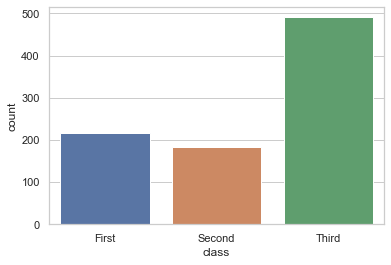

In [6]:
ax = sns.countplot(x="class", data=titanic)

In [7]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_fb15k')

In [8]:
entity = psql.read_sql("""SELECT DISTINCT subject FROM train UNION SELECT DISTINCT object FROM train
                          UNION SELECT DISTINCT subject FROM valid UNION SELECT DISTINCT object FROM valid
                          UNION SELECT DISTINCT subject FROM test UNION SELECT DISTINCT object FROM test
                        """, connection)
entity.head()

,subject
0,/m/0bw87
1,/m/0cp9f9
2,/m/07k2mq
3,/m/022_lg
4,/m/026ldz7


In [9]:
entity.count()

subject    14951
dtype: int64

In [10]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
subject,14951


In [11]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,subject,14951


In [12]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,subject,14951


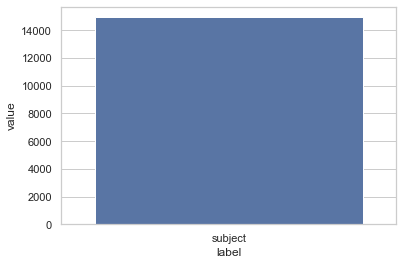

In [13]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [14]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,4094,/finance/currency/countries_used
1,4095,/aviation/airport/focus_city_for
2,4096,/basketball/basketball_position/player_roster_...
3,4097,/visual_art/art_period_movement/associated_art...
4,4098,/base/bioventurist/science_or_technology_compa...


In [15]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,1345
name,1345


In [16]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,1345
1,name,1345


In [17]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,1345
1,name,1345


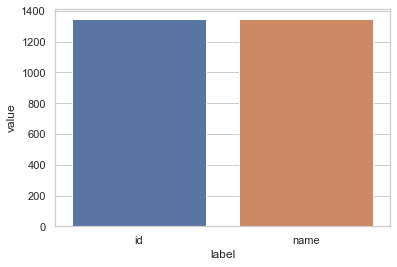

In [18]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [43]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,/m/01qscs,/award/award nominee/award nominations./award/...,/m/02x8n1n
1,1,/m/027rn,/location/country/form of government,/m/06cx9
2,1,/m/07pd_j,/film/film/genre,/m/02l7c8
3,2,/m/017dcd,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0
4,2,/m/040db,/base/activism/activist/area of activism,/m/0148d


In [44]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,592213
subject,592213
predicate,592213
object,592213


In [45]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


In [46]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts

,label,value
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


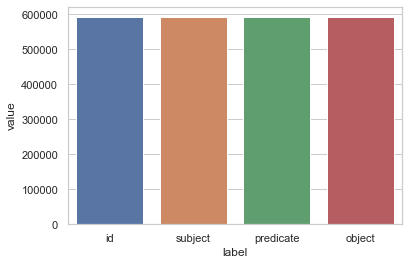

In [47]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [48]:
triple_counts.loc[0, 'value']

592213

In [49]:
triple_count = pd.Series({'triple': triple_counts.loc[0, 'value']})
entity_count = pd.Series({'entity': entity_counts.loc[0, 'value']})
relation_count = pd.Series({'relation': relation_counts.loc[0, 'value']})

triple_entity_relation_counts = pd.DataFrame([triple_count, entity_count, relation_count])
triple_entity_relation_counts.head()

,triple,entity,relation
0,592213.0,NaN,NaN
1,NaN,14951.0,NaN
2,NaN,NaN,1345.0


In [50]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,592213
entity,14951
relation,1345


In [51]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,592213
1,entity,14951
2,relation,1345


In [52]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,592213
1,entity,14951
2,relation,1345


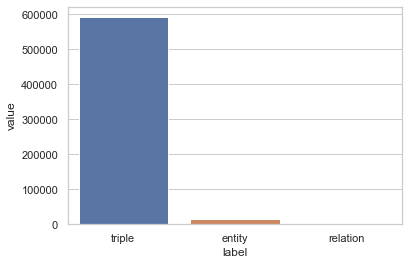

In [53]:
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)

In [66]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,1,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,2,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,2,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [67]:
fact = fact.drop(['id'], axis=1)
fact.index.name = 'id'
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
0,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [73]:
fact_counts = fact.count().to_frame()
fact_counts.head()

,0
subject,592213
s_name,582182
predicate,592213
object,592213
o_name,581971


In [74]:
fact_counts = fact_counts.reset_index()
fact_counts.head()

,index,0
0,subject,592213
1,s_name,582182
2,predicate,592213
3,object,592213
4,o_name,581971


In [75]:
fact_counts = fact_counts.rename(columns={'index': 'label', 0: 'value'})
fact_counts

,label,value
0,subject,592213
1,s_name,582182
2,predicate,592213
3,object,592213
4,o_name,581971


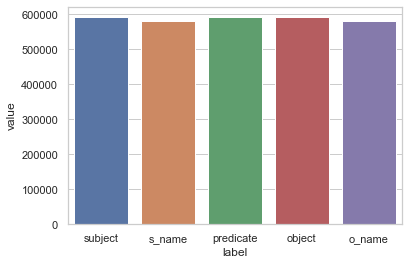

In [76]:
ax = sns.barplot(x="label", y="value", data=fact_counts)

In [81]:
predicate_counts = fact['predicate'].value_counts()
predicate_counts.head(50)

/award/award nominee/award nominations./award/award nomination/award nominee                       19764
/film/film/release date s./film/film regional release date/film release region                     15837
/award/award category/nominees./award/award nomination/award nominee                               14921
/award/award nominee/award nominations./award/award nomination/award                               14921
/people/person/profession                                                                          14220
/people/profession/people with this profession                                                     14220
/film/actor/film./film/performance/film                                                            11638
/film/film/starring./film/performance/actor                                                        11638
/award/award nominated work/award nominations./award/award nomination/award                        11594
/award/award category/nominees./award/award nomination/

In [82]:
predicate_counts.index

Index(['/award/award nominee/award nominations./award/award nomination/award nominee',
       '/film/film/release date s./film/film regional release date/film release region',
       '/award/award category/nominees./award/award nomination/award nominee',
       '/award/award nominee/award nominations./award/award nomination/award',
       '/people/person/profession',
       '/people/profession/people with this profession',
       '/film/actor/film./film/performance/film',
       '/film/film/starring./film/performance/actor',
       '/award/award nominated work/award nominations./award/award nomination/award',
       '/award/award category/nominees./award/award nomination/nominated for',
       ...
       '/law/court/judges./law/judicial tenure/judge',
       '/american football/football coach position/coaches holding this position./american football/football historical coach position/coach',
       '/metropolitan transit/transit service type/transit lines',
       '/ice hockey/hockey p

In [84]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head()

,index,predicate
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award category/nominees./award/award no...,14921
3,/award/award nominee/award nominations./award/...,14921
4,/people/person/profession,14220


In [88]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award category/nominees./award/award no...,14921
3,/award/award nominee/award nominations./award/...,14921
4,/people/person/profession,14220


[Text(0, 0, '/award/award nominee/award nominations./award/award nomination/award nominee'),
 Text(0, 0, '/film/film/release date s./film/film regional release date/film release region'),
 Text(0, 0, '/award/award category/nominees./award/award nomination/award nominee'),
 Text(0, 0, '/award/award nominee/award nominations./award/award nomination/award'),
 Text(0, 0, '/people/person/profession'),
 Text(0, 0, '/people/profession/people with this profession'),
 Text(0, 0, '/film/actor/film./film/performance/film'),
 Text(0, 0, '/film/film/starring./film/performance/actor'),
 Text(0, 0, '/award/award nominated work/award nominations./award/award nomination/award'),
 Text(0, 0, '/award/award category/nominees./award/award nomination/nominated for'),
 Text(0, 0, '/award/award winner/awards won./award/award honor/award winner'),
 Text(0, 0, '/film/film genre/films in this genre'),
 Text(0, 0, '/film/film/genre'),
 Text(0, 0, '/award/award nominated work/award nominations./award/award nominat

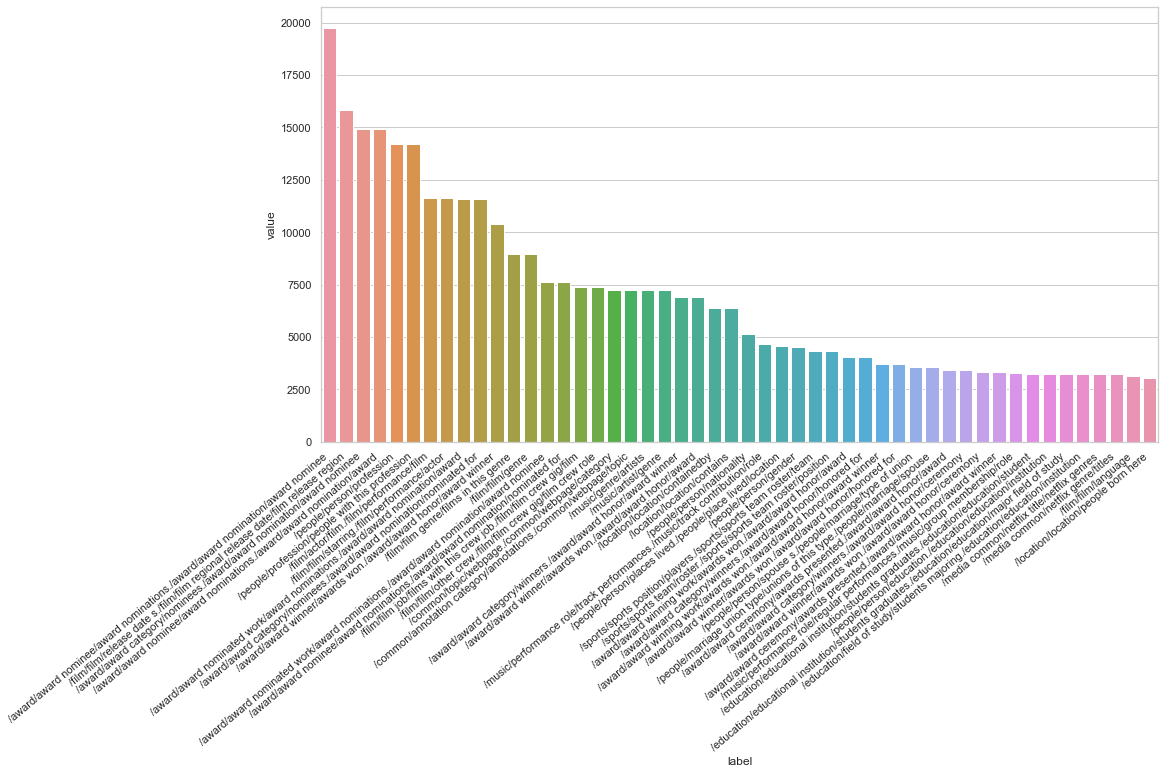

In [89]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [90]:
object_counts = fact['o_name'].value_counts().to_frame()
object_counts.head()

,o_name
United States,9645
United States dollar,7810
United States Department of Housing and Urban Development,4844
Male,3643
English language,3379


In [91]:
object_counts.index

Index(['United States', 'United States dollar',
       'United States Department of Housing and Urban Development', 'Male',
       'English language', 'Marriage', 'Forward (association football)',
       'Midfielder', 'Defender (association football)', 'Actor',
       ...
       'Party game', 'Sheep', 'House of Bourbon', 'Stockton-on-Tees', 'Duke',
       'People's Democratic Party (Nigeria)', 'Jockey', 'Filipino people',
       'Liberal Party (Philippines)', 'Independent (politician)'],
      dtype='object', length=14907)

In [92]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,Male,3643
4,English language,3379


In [93]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,Male,3643
4,English language,3379


[Text(0, 0, 'United States'),
 Text(0, 0, 'United States dollar'),
 Text(0, 0, 'United States Department of Housing and Urban Development'),
 Text(0, 0, 'Male'),
 Text(0, 0, 'English language'),
 Text(0, 0, 'Marriage'),
 Text(0, 0, 'Forward (association football)'),
 Text(0, 0, 'Midfielder'),
 Text(0, 0, 'Defender (association football)'),
 Text(0, 0, 'Actor'),
 Text(0, 0, 'Goalkeeper (association football)'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Drama film'),
 Text(0, 0, 'DVD'),
 Text(0, 0, 'New York City'),
 Text(0, 0, 'Guitar'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Film producer'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Screenwriter'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Female'),
 Text(0, 0, 'Make-up artist'),
 Text(0, 0, 'Supervising Sound Editor'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Visual effects supervisor'),
 Text(0, 0, 'Piano'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'President'),
 Text(0, 0, 'Special effects supervisor')

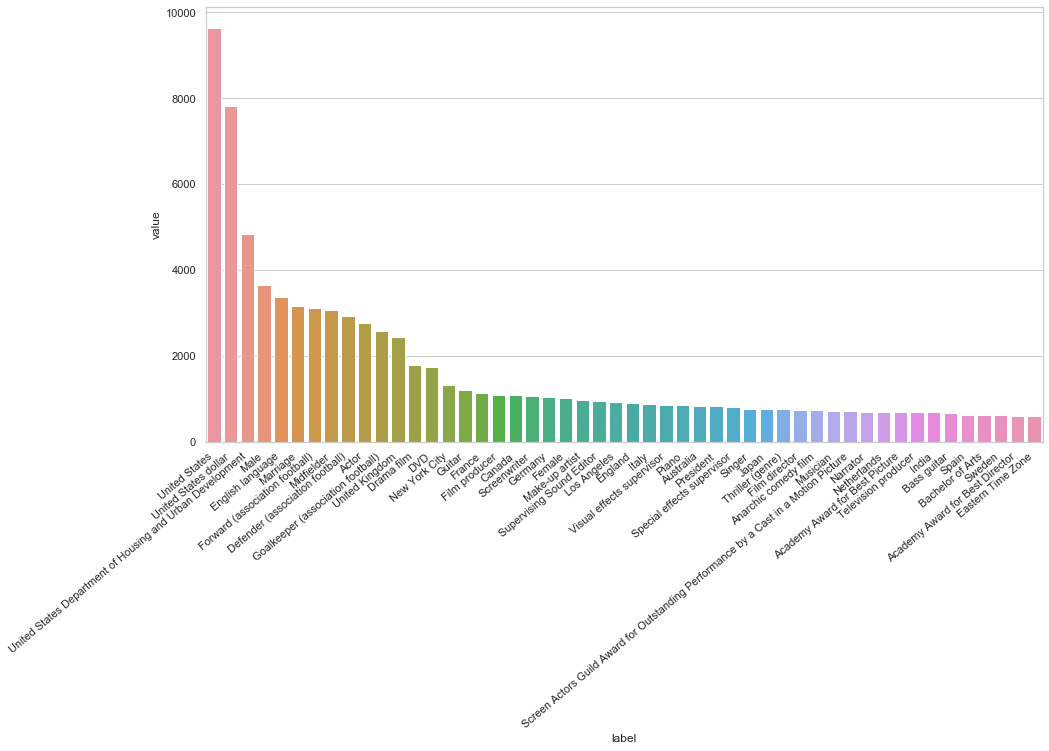

In [94]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=object_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [95]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
Marriage,3682
Actor,2769
United States,2318
Drama film,1797
Forward (association football),1554


In [96]:
subject_counts.index

Index(['Marriage', 'Actor', 'United States', 'Drama film',
       'Forward (association football)', 'Midfielder',
       'Defender (association football)', 'Goalkeeper (association football)',
       'Guitar', 'Film producer',
       ...
       'Community college', 'Baroque', 'Airports Authority of India',
       'High Sheriff', 'Platform game', 'Young-adult fiction',
       'Educational television', 'Tribal chief', 'Ferret Music',
       'Havok (software)'],
      dtype='object', length=14842)

In [97]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,Marriage,3682
1,Actor,2769
2,United States,2318
3,Drama film,1797
4,Forward (association football),1554


In [98]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,Marriage,3682
1,Actor,2769
2,United States,2318
3,Drama film,1797
4,Forward (association football),1554


[Text(0, 0, 'Marriage'),
 Text(0, 0, 'Actor'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Drama film'),
 Text(0, 0, 'Forward (association football)'),
 Text(0, 0, 'Midfielder'),
 Text(0, 0, 'Defender (association football)'),
 Text(0, 0, 'Goalkeeper (association football)'),
 Text(0, 0, 'Guitar'),
 Text(0, 0, 'Film producer'),
 Text(0, 0, 'Screenwriter'),
 Text(0, 0, 'Make-up artist'),
 Text(0, 0, 'Supervising Sound Editor'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Visual effects supervisor'),
 Text(0, 0, 'Piano'),
 Text(0, 0, 'President'),
 Text(0, 0, 'Special effects supervisor'),
 Text(0, 0, 'Singer'),
 Text(0, 0, 'Thriller (genre)'),
 Text(0, 0, 'Film director'),
 Text(0, 0, 'Anarchic comedy film'),
 Text(0, 0, 'Musician'),
 Text(0, 0, 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'),
 Text(0, 0, 'Narrator'),
 Text(0, 0, 'Television producer'),
 Text(0, 0, 'Academy Award for Best Picture'),
 Text(0, 0, 'Bass guitar'),
 Text(0, 0, 'Bachelor 

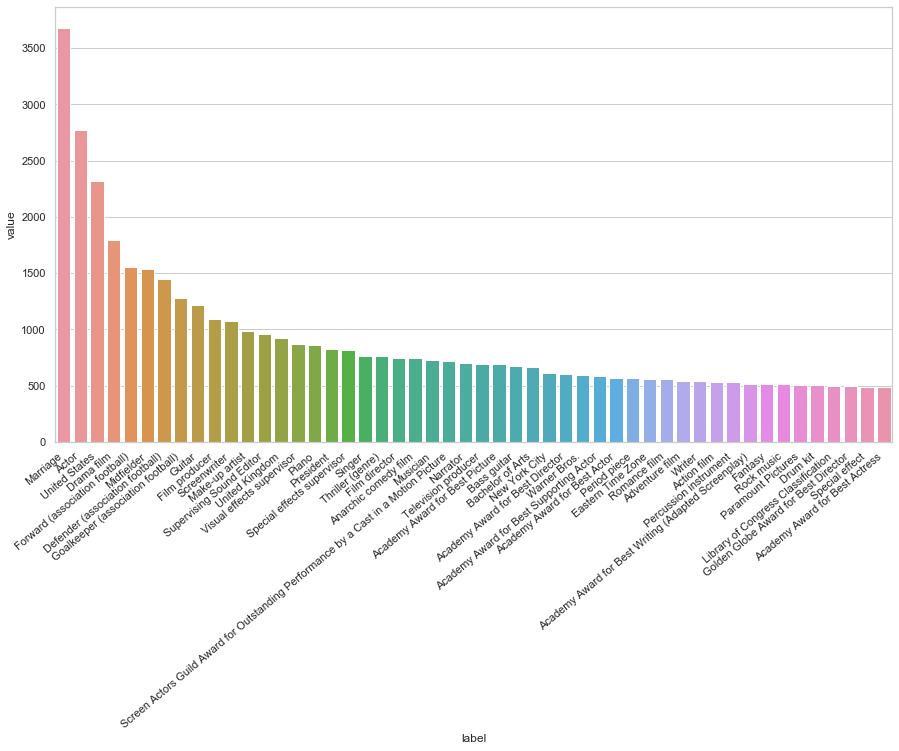

In [99]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=subject_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")